In [1]:
def function_1(input1):
    return input1+" First"

In [2]:
def function_2(input2):
    return input2+" Second"

In [3]:
def function_3(input3):
    return input2+" Third"

In [4]:
function_1("Aditi")

'Aditi First'

In [5]:
function_2("Kathalay")

'Kathalay Second'

In [20]:
from langgraph.graph import Graph

In [21]:
workflow_1 = Graph()

In [22]:
workflow_1.add_node("f1",function_1)

In [23]:
workflow_1.add_node("f2",function_2)

In [24]:
workflow_1.add_node("f3",function_3)

In [25]:
workflow_1.add_edge("f1","f2")

In [26]:
workflow_1.set_entry_point("f1")

In [27]:
workflow_1.set_finish_point("f2")

In [28]:
app = workflow_1.compile()

In [29]:
from IPython.display import Image,display

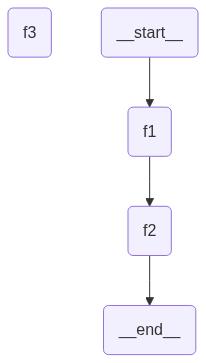

In [30]:
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
app.invoke("Hi, I am Aditi")

'Hi, I am Aditi First Second'

In [37]:
for output in app.stream("Hi"):
    for key,value in output.items():
        print(f"there is output from {key}")
        print("____")
        print(value)
        print("\n")

there is output from f1
____
Hi First


there is output from f2
____
Hi First Second




Integrate LLM Call

In [38]:
def llm(input):
    pass

In [39]:
def calculate_tokens(input):
    pass

In [42]:
workflow_2 = Graph()

In [43]:
workflow_2.add_node("LLM",llm)

In [44]:
workflow_2.add_node("Output",calculate_tokens)

In [45]:
workflow_2.add_edge("LLM",'Output')

In [49]:
workflow_2.set_entry_point("LLM")

In [50]:
workflow_2.set_finish_point("Output")

In [51]:
app = workflow_2.compile()

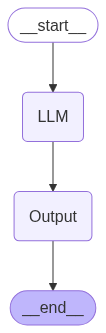

In [52]:
display(Image(app.get_graph().draw_mermaid_png()))

In [53]:
app.invoke("Tell me about India")

Now we add LLM

In [139]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model = ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    print("Model loaded")
    response = model.invoke(input)
    return response.content

In [140]:
def token_counter(input):
    #token = input.split()
    length = len(input)
    return length

In [141]:
workflow_3 = Graph()

In [142]:
workflow_3.add_node("First",llm)

In [143]:
workflow_3.add_node("Second",token_counter)

In [144]:
workflow_3.add_edge("First","Second")

In [145]:
workflow_3.set_entry_point("First")

In [146]:
workflow_3.set_finish_point("Second")

In [147]:
app = workflow_3.compile()

In [148]:
app.invoke("Tell me about India")

Model loaded


3043

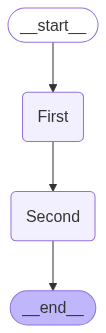

In [149]:
display(Image(app.get_graph().draw_mermaid_png()))

In [1]:
import os
os.environ['HF_TOKEN']=os.getenv("HF_TOKEN")